In [1]:
%load_ext autoreload
%autoreload 2

from roomgraph.data.etl import generate_graph
from pathlib import Path
import pandas as pd
import networkx as nx

In [3]:
data_dir = Path('../data/raw/cubicasa5k/')
plan_dirs = list(data_dir.glob('**/model.svg'))

In [4]:
graphs = []
labels = []
for plan_dir in plan_dirs:
    try:
        graph, label = generate_graph(plan_dir)
        graphs.append(graph)
        labels.append(label)
    except:
        # Some floor plans in the dataset don't contain any rooms
        # Safe to ignore there
        continue 

In [5]:
len(graphs)

4992

In [6]:
names: pd.Series = pd.concat([label['name'] for label in labels])

In [7]:
names.shape

(61394,)

<AxesSubplot: >

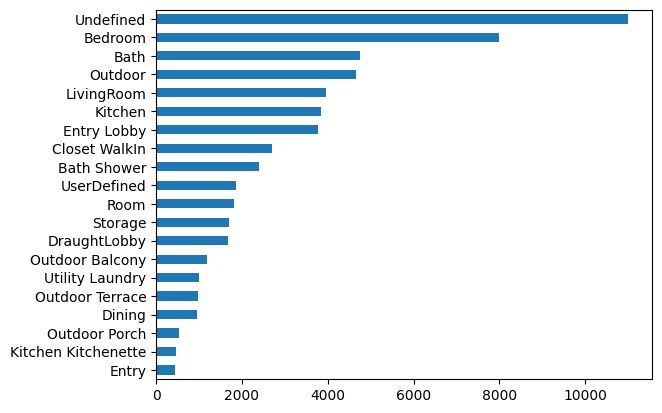

In [8]:
names.value_counts()[:20][::-1].plot.barh()

In [9]:
names.nunique()

69